## printer voorbeeld
- influence diagram maken voor printer en fouten die kunnen optreden



In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import math

In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

#### happy flow
- printer krijgt een opdracht
- als opdracht aan de beurt is wordt papier uit lade geladen
- inkt wordt op papier aangebracht
- papier wordt omgedraaid
- inkt wordt op papier aangebracht
- papier wordt naar uitbak geleid

##### extern waarneembare triggers voor inroepen reparatiedienst
- geen resultaat (uitbak is leeg, mechanisch probleem, papier/inkt op, 
- wel resultaat maar kwaliteit niet goed (inkt is op, mechanisch issue,  


#### Secundair proces bewaakt de werking van de printer, het gaat om:
- flow
- data

#### flow
De stappen geven de voortgang van het proces aan. Dmv een audit trail en status is duidelijk waar het proces zich bevindt, welke stage en in welke stap. Indien er geen output is dan kan dmv status de stage worden uitgezocht waar het probleem is ontstaan. Audit trail bevat:
- stage / stap gestart
- status waarmee stage stap is geeindigd

#### data 
De "data" reflecteert de inhoudelijke status van het proces. Als een stage of stap inhoudelijk iets toevoegd dan wordt dat aan de data toegevoegd. data is dan:
- wifi staat aan en is verbonden met netwerk
- ruimte voorraad buffer voor opdrachten en aantal opdrachten
- opdrachtgegevens; naam / eigenaar van een opdracht, omvang te printen bestand, ...
- papier voorraad in de inbak en formaat
- iets met rollers om papier te brengen
- inktlevels
- hoeveelheid papier in uitbak
- kwaliteit van prints
- aantal gemaakte prints sinds onderhoud

#### trigger voor reparateur: geen prints 

Gegeven een kansverdeling van de oorzaken van groot naar klein
- verbruikselementen zoals geen papier, inkt op, geen opdracht, ...
- mechanische problemen zoals vastgelopen papier, inktkoppen zitten dicht, ...
- electronische problemen zoals geen wifi, buffer vol, storingen

proces voor de reparateur
- check verbruikselementen, indien die goed zijn bekijk mechanische elemente etc

de kans nodes zijn te relateren aan de dataelementen, een kansnode kan bijvoorbeeeld zijn: 
- zwarte inkt cartrigde met waarden voor voldoende / onvoldoende of een percentage 0/10/20/30 etc. De CPT laat dan zien wat de kans is op een bepaalde waarde aan inktvoorraad (bijv leeg)
- processtap zoals papier keren voor dubbelzijdig printen, de waarden van een procestap zijn dan: niet gestart / gestart / succesvol afgerond of exceptie. De kansverdeling geeft de kans weer op volbrengen van de stap

influence diagram:
- vanuit "geen resultaat" loop je terug in het proces tot en met geen opdracht ontvangen
- als een niet is afgerond dan kan dat komen door de kans op oorzaken


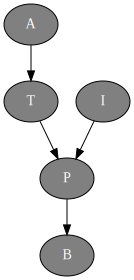

In [23]:
# maak diagram instantie
diag = gum.InfluenceDiagram()

# voeg kans nodes toe en arc ertussen
# api: LabelizedVariable(aName, aDesc=’’, nbrLabel=2) -> LabelizedVariable
blvar = gum.LabelizedVariable("B", "Uitbak", 2)
blvar.changeLabel(0, 'leeg')
blvar.changeLabel(1, 'gevuld')
B=diag.addChanceNode(blvar)

plvar = gum.LabelizedVariable("P", "Printen", 2)
plvar.changeLabel(0, 'niet gestart')
plvar.changeLabel(1, 'gestart')
#plvar.changeLabel(2, 'afgerond')
P=diag.addChanceNode(plvar)

alvar = gum.LabelizedVariable("A", "Papier inbak", 2)
alvar.changeLabel(0, 'niet aanwezig')
alvar.changeLabel(1, 'aanwezig')
#plvar.changeLabel(2, 'afgerond')
A=diag.addChanceNode(alvar)


tlvar = gum.LabelizedVariable("T", "Transport", 2)
tlvar.changeLabel(0, 'niet gestart')
tlvar.changeLabel(1, 'gestart')
T=diag.addChanceNode(tlvar)

ilvar = gum.LabelizedVariable("I", "Inkt", 2)
ilvar.changeLabel(0, 'niet aanwezig')
ilvar.changeLabel(1, 'aanwezig')
I=diag.addChanceNode(ilvar)

# arc van B naar P
diag.addArc(diag.idFromName("A"),T)
diag.addArc(diag.idFromName("P"),B)
diag.addArc(diag.idFromName("T"),P)
diag.addArc(diag.idFromName("I"),P)

# voeg decision en utility nodes to en links
#dlvar = gum.LabelizedVariable("D","Accept Bet",2)
#dlvar.changeLabel(0, 'yes')
#dlvar.changeLabel(1, 'no')
#D=diag.addDecisionNode(dlvar)

# definitie utility
#ulvar = gum.LabelizedVariable("U","U",1)
#ulvar.changeLabel(0, 'U(R, AB)')
#U=diag.addUtilityNode(ulvar)

# arc van "Result" en "Accept Bet" naar utility 
#diag.addArc(diag.idFromName("R"),U)
#diag.addArc(diag.idFromName("D"),U)

# laat diagram zien
gnb.showInfluenceDiagram(diag)

de kans dat er iets in de uitbak zit is afhankelijk van:
- of er geprint is maar dit is afhankelijk van...
- of er papier is getransporteerd van inbak naar printkoppen
- of er papier in de inbak zit 